In [1]:
from multiprocessing import cpu_count
from pathlib import Path
from typing import List, Union, AnyStr
from math import pi
import pickle

import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import model_selection
from tqdm import tqdm
import torch_optimizer
from torch.utils.data import Dataset
import pandas as pd
import random

import torch_burn as tb
import utils

# 1122 CLSTM4-6

In [2]:
data1 = np.load('checkpoint/1122-Scene3-CLSTM4-win120-6/sample/0063.npy')
data2 = np.load('checkpoint/1122-Scene3-LSTM-win48-3/sample/0044.npy')

In [3]:
target1 = data1[:3]
output1 = data1[3:]
target2 = data2[:3]
output2 = data2[3:]

In [4]:
def fig(target1, output1, s, t):
    X = np.linspace(s / 60, t / 60, t - s)

    plt.figure(figsize=(15, 3))

    plt.subplot(1, 3, 1)
    plt.plot(X, target1[0][s:t])
    plt.plot(X, output1[0][s:t])
    plt.legend(['yaw; target', 'yaw; prediction'])
    plt.ylabel('degree')
    plt.xlabel('time (s)')

    plt.subplot(1, 3, 2)
    plt.plot(X, target1[1][s:t])
    plt.plot(X, output1[1][s:t])
    plt.legend(['pitch; target', 'pitch; prediction'])
    plt.ylabel('degree')
    plt.xlabel('time (s)')

    plt.subplot(1, 3, 3)
    plt.plot(X, target1[2][s:t])
    plt.plot(X, output1[2][s:t])
    plt.legend(['roll; target', 'roll; prediction'])
    plt.ylabel('degree')
    plt.xlabel('time (s)')

    plt.tight_layout()
    #plt.savefig('img/1116-yaw-LSTM4, 많은 움직임, 잘안됨.png')
    plt.show()
    
    d = [np.mean(target1[0][s:t] - output1[0][s:t]), np.mean(target1[1][s:t] - output1[1][s:t]), np.mean(target1[2][s:t] - output1[2][s:t])]
    print('MAE: ', d[0], d[1], d[2])

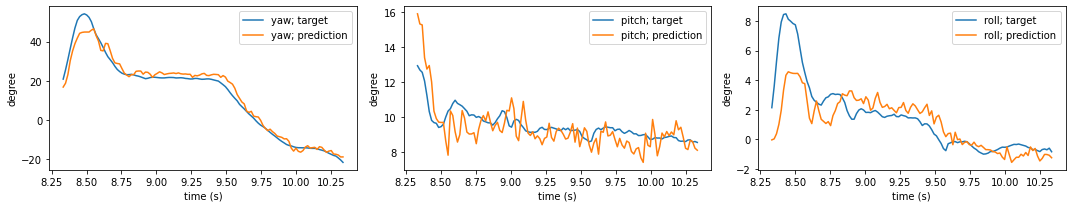

MAE:  -0.6932418 0.1666991 0.33594945


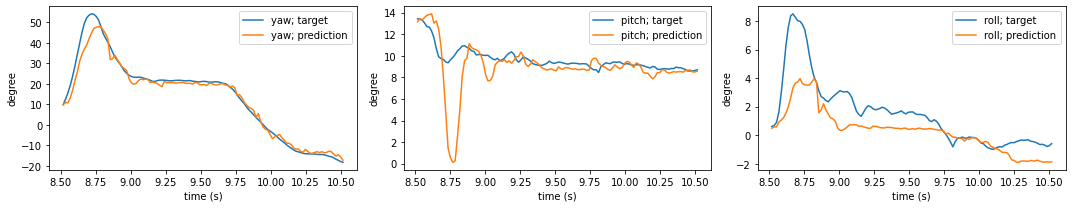

MAE:  1.0152361 0.6633742 1.2017593


In [5]:
s = 500
t = s + 120
fig(target1, output1, s, t)
fig(target2, output2, s+11, t+11)

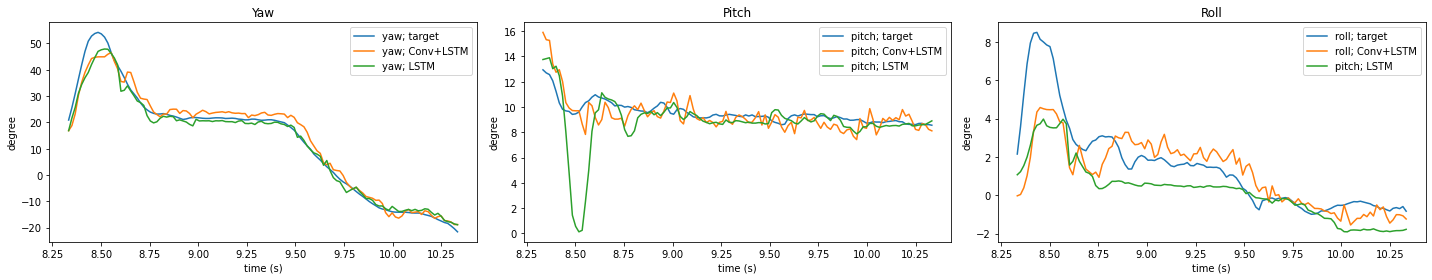

In [6]:
s = 500
t = s + 120
offset = 15
X = np.linspace(s / 60, t / 60, t - s)

plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.plot(X, target1[0][s:t])
plt.plot(X, output1[0][s:t])
plt.plot(X, output2[0][s+offset:t+offset])
plt.legend(['yaw; target', 'yaw; Conv+LSTM', 'yaw; LSTM'])
plt.ylabel('degree')
plt.xlabel('time (s)')
plt.title('Yaw')

plt.subplot(1, 3, 2)
plt.plot(X, target1[1][s:t])
plt.plot(X, output1[1][s:t])
plt.plot(X, output2[1][s+offset:t+offset])
plt.legend(['pitch; target', 'pitch; Conv+LSTM', 'pitch; LSTM'])
plt.ylabel('degree')
plt.xlabel('time (s)')
plt.title('Pitch')

plt.subplot(1, 3, 3)
plt.plot(X, target1[2][s:t])
plt.plot(X, output1[2][s:t])
plt.plot(X, output2[2][s+offset:t+offset])
plt.legend(['roll; target', 'roll; Conv+LSTM', 'pitch; LSTM'])
plt.ylabel('degree')
plt.xlabel('time (s)')
plt.title('Roll')

plt.tight_layout()
plt.savefig('img/1122-result.png')
plt.show()

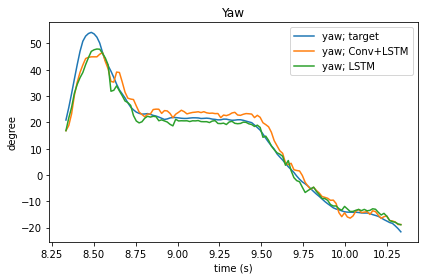

In [9]:
plt.plot(X, target1[0][s:t])
plt.plot(X, output1[0][s:t])
plt.plot(X, output2[0][s+offset:t+offset])
plt.legend(['yaw; target', 'yaw; Conv+LSTM', 'yaw; LSTM'])
plt.ylabel('degree')
plt.xlabel('time (s)')
plt.title('Yaw')
plt.tight_layout()
plt.savefig('img/1122-result-yaw.png')

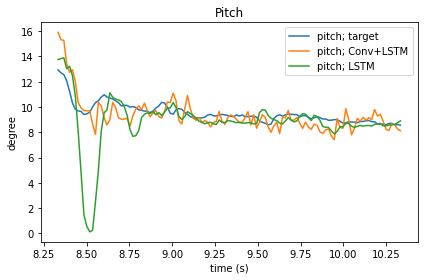

In [10]:
plt.plot(X, target1[1][s:t])
plt.plot(X, output1[1][s:t])
plt.plot(X, output2[1][s+offset:t+offset])
plt.legend(['pitch; target', 'pitch; Conv+LSTM', 'pitch; LSTM'])
plt.ylabel('degree')
plt.xlabel('time (s)')
plt.title('Pitch')
plt.tight_layout()
plt.savefig('img/1122-result-pitch.png')

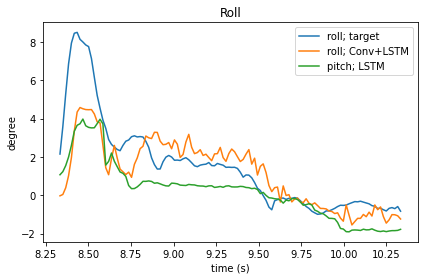

In [11]:
plt.plot(X, target1[2][s:t])
plt.plot(X, output1[2][s:t])
plt.plot(X, output2[2][s+offset:t+offset])
plt.legend(['roll; target', 'roll; Conv+LSTM', 'pitch; LSTM'])
plt.ylabel('degree')
plt.xlabel('time (s)')
plt.title('Roll')
plt.tight_layout()
plt.savefig('img/1122-result-roll.png')